<a href="https://colab.research.google.com/github/Deio828/Cat-Vs-Dog/blob/master/Cat_vs_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [34]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
from os import listdir
import random
import sys
import cv2
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Input, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from time import time


# **Importing Dataset**

In [2]:
from google.colab import files
!pip install -q kaggle

In [3]:
# refer to this video https://www.youtube.com/watch?v=tGw-ZACouik
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
#!mkdir ~/.kaggle # <-------- uncomment this for the first time
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [5]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 811M/817M [00:10<00:00, 66.5MB/s]
100% 817M/817M [00:11<00:00, 77.7MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip

# **Model**

In [7]:
def load_model(input_shape):
  input = Input(shape=input_shape, name='Input_Layer')
  x = Conv2D(filters=128 , kernel_size=(5,5) , strides=(1,1) , activation='relu', name='conv_layer_1')(input)
  x = MaxPooling2D(pool_size=(3,3),strides=(4,4),name='pool_layer_1')(x)
  x = Conv2D(filters=256 , kernel_size=(5,5) , strides=(1,1) , activation='relu', name='conv_layer_2')(x)
  x = MaxPooling2D(pool_size=(2,2),strides=(2,2),name='pool_layer_2')(x)
  x = Conv2D(filters=200 , kernel_size=(5,5) , strides=(1,1) , activation='relu', name='conv_layer_3')(x)
  x = MaxPooling2D(pool_size=(2,2),strides=(8,8),name='pool_layer_3')(x)
  
  x = Flatten()(x)
  x = Dense(3200, activation='relu', name='FC_layer_1')(x)
  x = Dense(3200, activation='relu', name='FC_layer_2')(x)
  output = Dense(2, activation='softmax', name='Output_Layer')(x)

  model = Model(input,output,name='My_Model')
  model.summary()
  return model


In [8]:
model = load_model((300,300,3))
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt , loss='categorical_crossentropy' , metrics=['accuracy'])

Model: "My_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 296, 296, 128)     9728      
_________________________________________________________________
pool_layer_1 (MaxPooling2D)  (None, 74, 74, 128)       0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 70, 70, 256)       819456    
_________________________________________________________________
pool_layer_2 (MaxPooling2D)  (None, 35, 35, 256)       0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 31, 31, 200)       1280200   
_________________________________________________________________
pool_layer_3 (MaxPooling2D)  (None, 4, 4, 200)         0  

# **Data Generators**


In [9]:
IM_WIDTH = 300
IM_HIGHT = 300

In [10]:
def image_preprocess(image):
  image = np.array(image)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,dsize=(IM_WIDTH,IM_HIGHT))
  image = image/255.
  return image

In [11]:
def data_generator(file_path , chunck_size=10):
  all_files = listdir(file_path)
  random.shuffle(all_files)
  random.shuffle(all_files)
  i = 0
  while True:
    chunck_data = []
    chunck_labels = []
    for _ in range (chunck_size):
      
      if i == len(all_files):
        i=0

      image = Image.open(file_path + all_files[i])
      if all_files[i].find('cat'):
        haha = [0,1]
        haha=np.array(haha)
        chunck_labels.append(haha)
      elif all_files[i].find('dog'):
        haha = [1,0]
        haha=np.array(haha)        
        chunck_labels.append(haha)     
      i+=1
      image = image_preprocess(image)
      chunck_data.append(image)
    chunck_data = np.array(chunck_data)
    chunck_labels = np.array(chunck_labels)

    yield (chunck_data, chunck_labels)

(300, 300, 3)


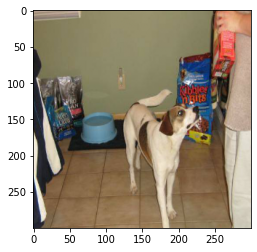

In [12]:
file_path = '/content/train/train/'
all_files = listdir(file_path)
image = Image.open(file_path + all_files[0])
image = image_preprocess(image)
print(image.shape)
plt.imshow(image)
plt.show()

# **Fitting**

In [13]:
file_path = '/content/train/train/'
file_length = len(listdir(file_path))
model.fit_generator(data_generator(file_path) , epochs=5 , steps_per_epoch=file_length)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
25000/25000 [==============================] - 1730s 69ms/step - loss: 0.3993 - accuracy: 0.8006
Epoch 2/5
25000/25000 [==============================] - 1689s 68ms/step - loss: 0.0529 - accuracy: 0.9808
Epoch 3/5
25000/25000 [==============================] - 1701s 68ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 4/5
25000/25000 [==============================] - 1686s 67ms/step - loss: 2.8111e-05 - accuracy: 1.0000
Epoch 5/5
25000/25000 [==============================] - 1687s 67ms/step - loss: 1.4101e-05 - accuracy: 1.0000


In [14]:
model.save('/content/drive/My Drive/CatVsDog_myNet.h5')

Photo number: 66
This is a DOG
Excution time: 0.039783477783203125 seconds


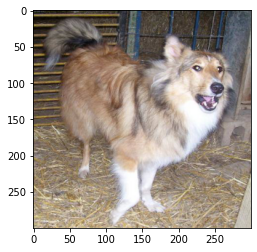

In [40]:
file_path = '/content/test/test/'
pic_num = 66
print("Photo number: {}".format(pic_num))
all_files = listdir(file_path)
image = Image.open(file_path + all_files[pic_num])
image = image_preprocess(image)
input_image = np.expand_dims(image , axis=0)
start = time()
prediction = model.predict(input_image)
end = time()
if np.argmax(prediction) == 0:
  print("This is a CAT")
elif np.argmax(prediction) == 1:
  print("This is a DOG")
print("Excution time: {} seconds".format(end-start))
plt.imshow(image)
plt.show()